In [1]:
import numpy as np
import os
import pandas as pd
import semopy

In [2]:
tw = pd.read_csv('data_by_tweet/tw_cleaned_2.csv')
tw.head()

,ツイート本文,ツイート本文_x,時間,media_exist,reply_flg,URLクリック数,いいね,リツイート,インプレッション,エンゲージメント,...,詳細クリック,返信,文字数,YMD,YEAR,MONTH,DAY,TIME,WEEKDAY,WEEK
0,@teatime3fairy こちらこそ宜しくお願いします😆,こちらこそ宜しくお願いします😆,2021-03-30 14:34:00+00:00,False,True,0.0,1.0,0.0,14.0,1.0,...,0.0,0.0,16,20210330,2021,3,30,14,1,13
1,ねむねむむむ🥱 https://t.co/Ggro68dOXM,ねむねむむむ🥱,2021-03-30 07:57:00+00:00,True,False,3.0,216.0,3.0,2654.0,331.0,...,29.0,0.0,8,20210330,2021,3,30,7,1,13
2,こっちに来るかと思いきや\nそれちゃって💦\nパニック映像になった😂😂 https://t....,こっちに来るかと思いきや それちゃって💦 パニック映像になった😂😂,2021-03-25 12:07:00+00:00,True,False,4.0,107.0,0.0,1362.0,199.0,...,10.0,0.0,34,20210325,2021,3,25,12,3,12
3,@santemafi ありがとうございます😊\n頑張りました😆,ありがとうございます😊 頑張りました😆,2021-03-25 02:53:00+00:00,False,True,0.0,1.0,0.0,35.0,1.0,...,0.0,0.0,20,20210325,2021,3,25,2,3,12
4,@hitomin_rabi 頑張りました😊\nこの後いっぱいおやつあげました🍭,頑張りました😊 この後いっぱいおやつあげました🍭,2021-03-25 02:53:00+00:00,False,True,0.0,1.0,0.0,37.0,2.0,...,0.0,1.0,25,20210325,2021,3,25,2,3,12


In [3]:
pd.set_option('display.max_columns', tw.shape[1])

In [4]:
tw.describe()

,URLクリック数,いいね,リツイート,インプレッション,エンゲージメント,エンゲージメント率,ハッシュタグクリック,フォローしている,メディアのエンゲージメント数,メディアの再生数,ユーザープロフィールクリック,詳細クリック,返信,文字数,YMD,YEAR,MONTH,DAY,TIME,WEEKDAY,WEEK
count,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,9.450000e+02,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,1.173545,113.569312,2.420106,1786.151323,232.324868,0.077418,0.434921,0.009524,63.788360,368.938624,21.088889,28.747090,1.027513,30.970370,2.020145e+07,2020.082540,6.046561,16.693122,9.602116,3.253968,25.080423
std,4.181975,207.630809,6.752449,4139.579216,646.294668,0.060940,1.993168,0.097176,319.485872,968.711892,62.837618,126.021944,2.968993,26.801475,2.648122e+03,0.275331,2.989734,9.723563,5.986071,2.010841,13.225388
min,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.020022e+07,2020.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,31.000000,1.000000,0.026316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,2.020040e+07,2020.000000,3.000000,8.000000,5.000000,2.000000,14.000000
50%,0.000000,1.000000,0.000000,75.000000,3.000000,0.063209,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,21.000000,2.020073e+07,2020.000000,5.000000,17.000000,9.000000,3.000000,22.000000
75%,0.000000,175.000000,2.000000,2058.000000,291.000000,0.127866,0.000000,0.000000,44.000000,383.000000,29.000000,21.000000,1.000000,39.000000,2.020100e+07,2020.000000,8.000000,25.000000,14.000000,5.000000,36.000000
max,68.000000,1582.000000,74.000000,55422.000000,13579.000000,0.363636,27.000000,1.000000,7759.000000,11742.000000,1365.000000,2716.000000,53.000000,152.000000,2.021033e+07,2021.000000,12.000000,31.000000,23.000000,6.000000,53.000000


In [5]:
tw.columns

Index(['ツイート本文', 'ツイート本文_x', '時間', 'media_exist', 'reply_flg', 'URLクリック数',
       'いいね', 'リツイート', 'インプレッション', 'エンゲージメント', 'エンゲージメント率', 'ハッシュタグクリック',
       'フォローしている', 'メディアのエンゲージメント数', 'メディアの再生数', 'ユーザープロフィールクリック', '詳細クリック',
       '返信', '文字数', 'YMD', 'YEAR', 'MONTH', 'DAY', 'TIME', 'WEEKDAY', 'WEEK'],
      dtype='object')

In [6]:
tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ツイート本文          945 non-null    object 
 1   ツイート本文_x        943 non-null    object 
 2   時間              945 non-null    object 
 3   media_exist     945 non-null    bool   
 4   reply_flg       945 non-null    bool   
 5   URLクリック数        945 non-null    float64
 6   いいね             945 non-null    float64
 7   リツイート           945 non-null    float64
 8   インプレッション        945 non-null    float64
 9   エンゲージメント        945 non-null    float64
 10  エンゲージメント率       945 non-null    float64
 11  ハッシュタグクリック      945 non-null    float64
 12  フォローしている        945 non-null    int64  
 13  メディアのエンゲージメント数  945 non-null    int64  
 14  メディアの再生数        945 non-null    int64  
 15  ユーザープロフィールクリック  945 non-null    float64
 16  詳細クリック          945 non-null    float64
 17  返信              945 non-null    flo

# 構造方程式モデリング（SEM: Structural Equation Modeling）

- =~ 測定演算子
- ~ 回帰演算子
- ~~ 分散演算子

In [7]:
mod = """\
engagement =~ インプレッション + いいね + リツイート
media =~ media_exist + メディアの再生数 + メディアのエンゲージメント数
reply =~ reply_flg + 返信
click =~ ユーザープロフィールクリック + ハッシュタグクリック + 詳細クリック
engagement ~ media
engagement ~ click
reply ~ engagement
engagement ~~ media
インプレッション ~~ メディアの再生数
いいね ~~ 詳細クリック
"""

In [8]:
model = semopy.Model(mod)

In [9]:
tar_cols = ['インプレッション', 'いいね', 'リツイート', 
            'media_exist', 'メディアの再生数', 'メディアのエンゲージメント数', 
            'reply_flg', '返信',
            'ユーザープロフィールクリック','ハッシュタグクリック', '詳細クリック']

df_tw = tw[tar_cols].copy()
df_tw = df_tw.astype(np.int64)

In [10]:
model.fit(df_tw)

SolverResult(fun=11.067683964849913, success=True, n_it=639, x=array([ 5.88955532e+02,  1.69459124e+01,  2.26012578e+03,  3.50103224e+02,
       -5.05419837e+00,  5.45639661e-02,  7.73045728e+00, -6.55950054e+01,
        1.97373725e+00, -1.09672055e+00,  5.38993266e-01,  3.96615293e+01,
        1.10412944e+00,  8.55899157e+06, -8.65090410e+00,  2.14729484e+04,
        2.07838538e+03,  1.73462280e-01,  4.68701479e+05,  1.60431870e+01,
        3.43238043e+00,  7.83488542e+03,  1.38337710e-18,  1.15662731e-01,
        5.10098567e+04,  5.65055294e+00,  1.82136910e+02,  1.68519855e-01,
        5.42003744e+00]), message='Optimization terminated successfully', name_method='SLSQP', name_obj='MLW')

In [11]:
df_result = model.inspect()

df_result

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,engagement,~,media,-6.559501e+01,0.002325,-28209.04584,0.0
1,engagement,~,click,1.973737e+00,0.061493,32.097168,0.0
2,reply,~,engagement,-1.096721e+00,0.036106,-30.374743,0.0
3,インプレッション,~,engagement,1.000000e+00,-,-,-
4,いいね,~,engagement,5.889555e+02,0.013884,42418.349087,0.0
5,リツイート,~,engagement,1.694591e+01,0.481505,35.193652,0.0
6,media_exist,~,media,1.000000e+00,-,-,-
7,メディアの再生数,~,media,2.260126e+03,0.000264,8557155.064085,0.0
8,メディアのエンゲージメント数,~,media,3.501032e+02,0.000376,931076.175505,0.0
9,reply_flg,~,reply,1.000000e+00,-,-,-


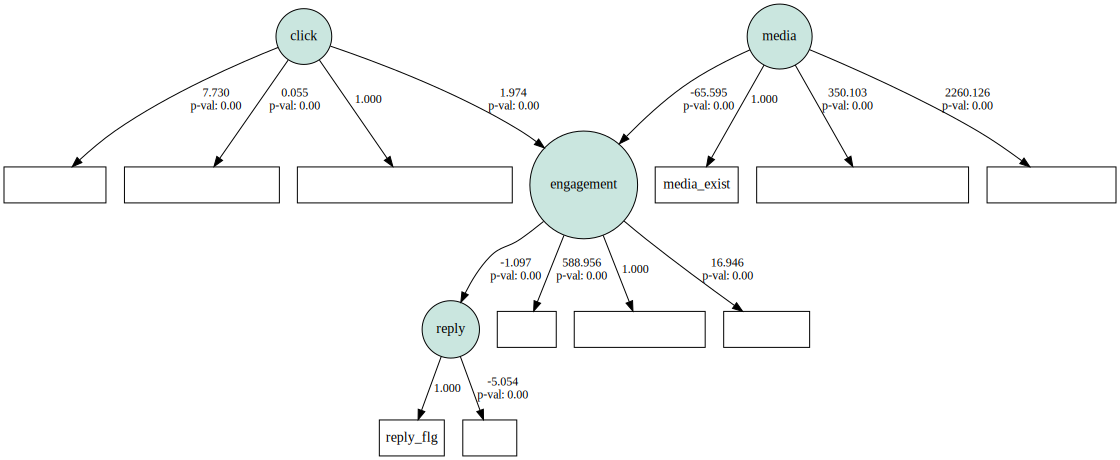

In [12]:
semopy.semplot(model, 'sem_model.png')

In [13]:
semopy.calc_stats(model)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,37,55,10458.961347,0.0,17133.158139,0.389749,0.389549,0.092572,0.389549,0.09287,0.546245,35.864632,176.548995,11.067684
